# Pilih Mode

In [14]:
mode = 'pilihan' # 'pilihan/raw'

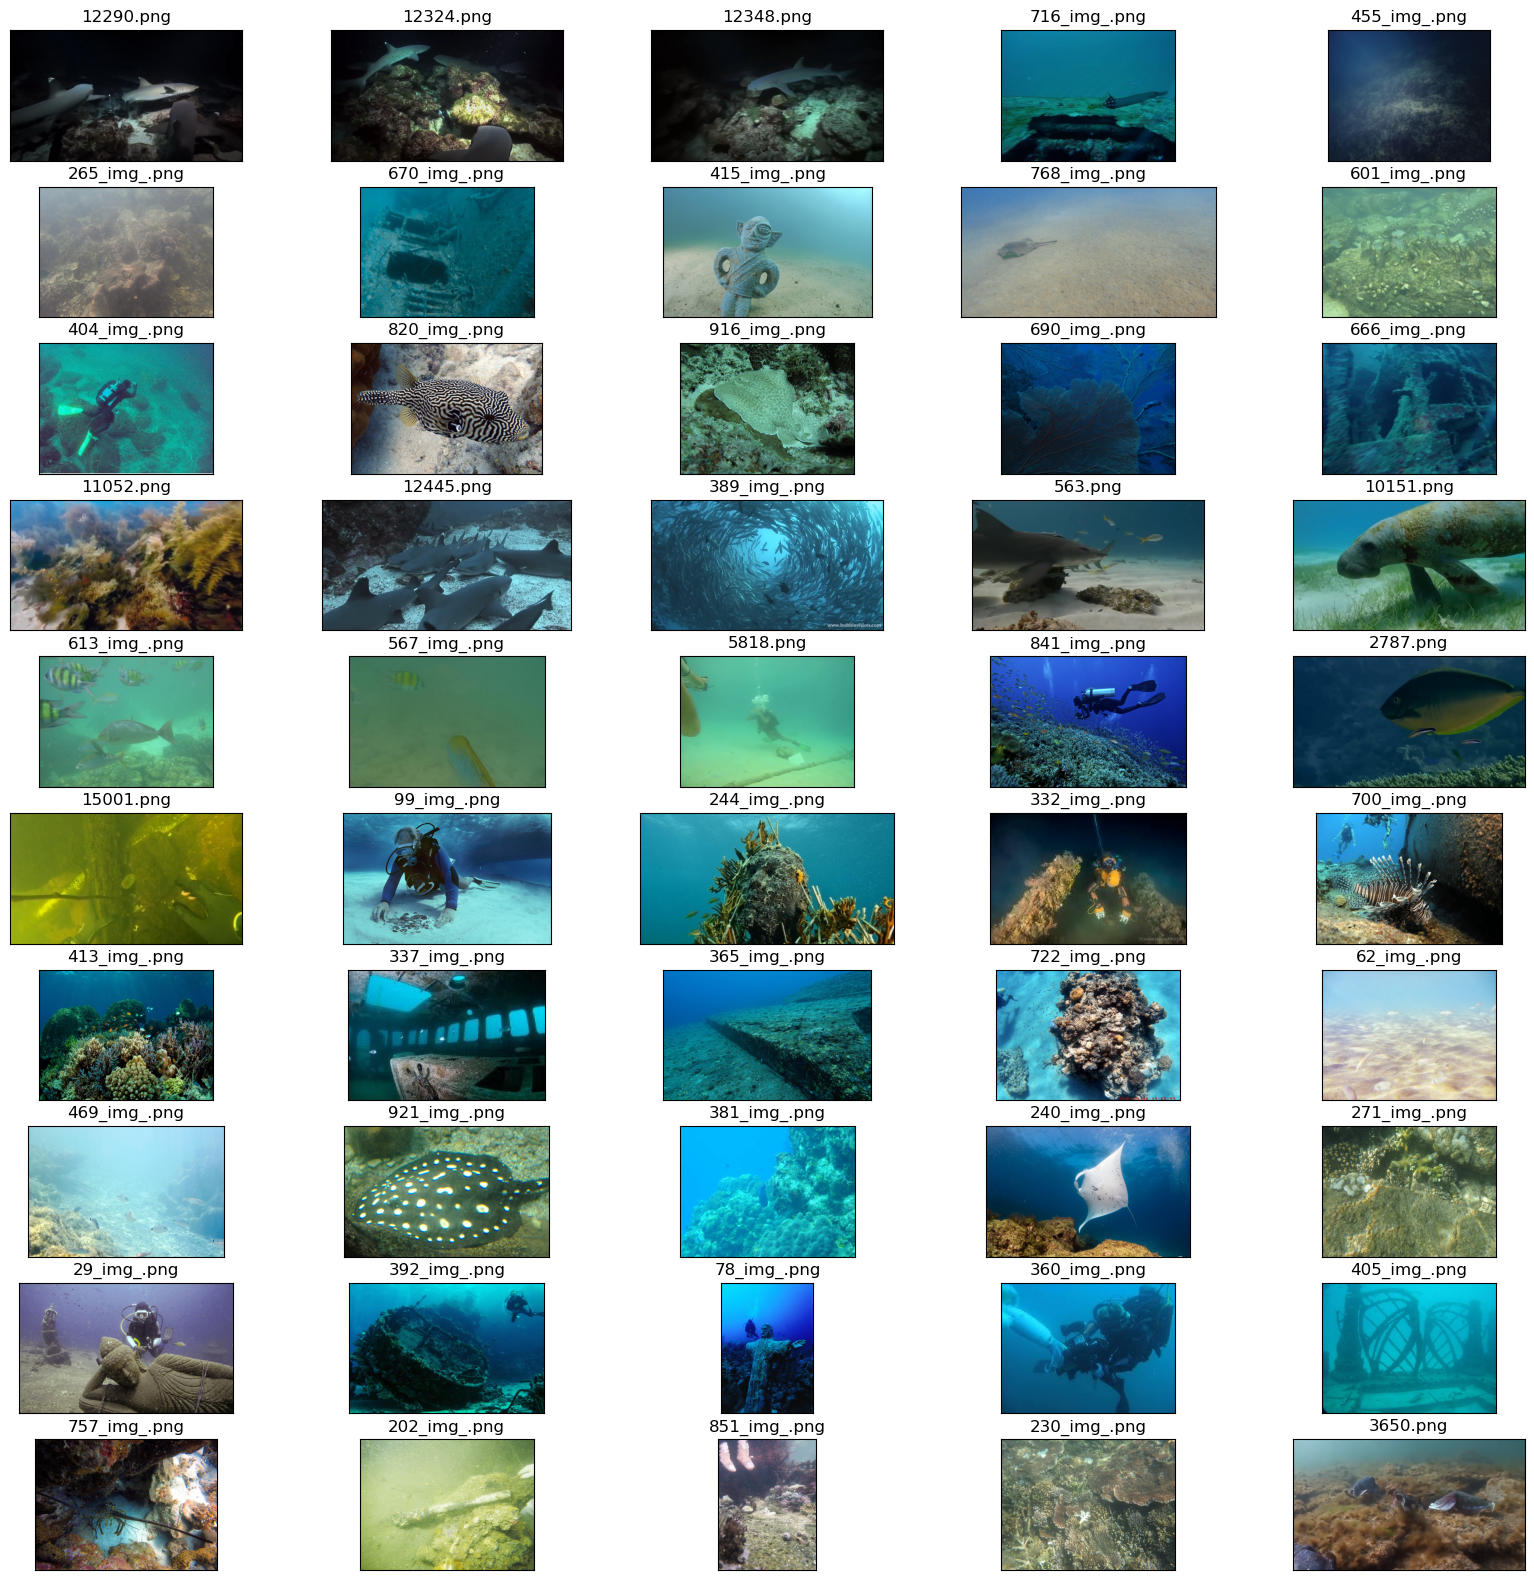

In [15]:
import importlib
import lib.init_image_group
importlib.reload(lib.init_image_group)
from lib.init_image_group import init_semua_png, show_image_group, init_pilihan


if mode == 'pilihan':
    image_group = init_pilihan()
elif mode == 'raw':
    image_group = init_semua_png('../UIEB/raw-890')

show_image_group(image_group) # 890(4s) vs 50(4.7s)

# Hitung MSE PSNR awal

In [16]:
import lib.msepsnr
importlib.reload(lib.msepsnr)
from lib.msepsnr import  evaluate_folders_df
evaluate_folders_df( # 890(35.4s) vs 50(1.5s)
    image_group,
    out_csv_string="csv/"+mode+"_mse_psnr.csv",
    ref_col="ref",
    pred_col="image",
    device=None,  # auto pilih CUDA kalau ada
    data_range=None
)

Menilai 50 file...


c:\Users\User\JupyterProjects\underwater\250815_underwater\lib\msepsnr.py:16: UserWarning: The given buffer is not writable, and PyTorch does not support non-writable tensors. This means you can write to the underlying (supposedly non-writable) buffer using the tensor. You may want to copy the buffer to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\torch\csrc\utils\tensor_new.cpp:1584.)
  arr = torch.frombuffer(img.tobytes(), dtype=torch.uint8)


Selesai. Berhasil: 50/50
Rata-rata MSE : 2363.203991
Rata-rata PSNR: 16.031238 dB


# Hitung fitur color space ternormalisasi

In [ ]:
import lib.export
import lib.feature_color_space 
importlib.reload(lib.export)
importlib.reload(lib.feature_color_space)
from lib.feature_color_space import extract_color_stats_cuda
from lib.export import df_to_csv, df_columns_to_csv

results = []
for image_path in image_group.image:
    result = extract_color_stats_cuda(image_path) # 890(25.5s) vs 50(1.5s)
    results.append(result)

columns=[
    'filename', 'mean_R', 'mean_G', 'mean_B', 'var_R', 'var_G', 'var_B',
    'mean_H', 'mean_S', 'mean_V', 'var_H', 'var_S', 'var_V',
    'mean_L', 'mean_a', 'mean_b', 'var_L', 'var_a', 'var_b',
    'mean_R_over_G', 'mean_G_over_B', 'mean_B_over_R',
    'var_R_over_G', 'var_G_over_B', 'var_B_over_R'
]
# print(df.head())

df_columns_to_csv(columns, results, mode+'_feature_color_space_kecil')


# import matplotlib.pyplot as plt
# plt.style.use('seaborn')


DataFrame berhasil dikonversi menjadi CSV!


# Hitung UIQM dan UCIQE

In [ ]:
import lib.lib_old_validation
importlib.reload(lib.lib_old_validation)
from lib.lib_old_validation import  getScore_from_path


results = []
for image_path in image_group.image:
    filename, UIQM, UCIQE = getScore_from_path(image_path) # 890(xxxs) vs 50(38s)
    result = {
        "filename": filename,
        "UIQM": float(UIQM),
        "UCIQE": float(UCIQE),
    }
    results.append(result)

columns=[
    'filename', 'UIQM', 'UCIQE'
]
# print(df.head())

df_columns_to_csv(columns, results, mode+'_feature_color_space_kecil')


[{'filename': '12290.png',
  'UIQM': 1.53695463577522,
  'UCIQE': 10.965627759224432},
 {'filename': '12324.png',
  'UIQM': 2.0896967782024,
  'UCIQE': 5.860808125670832},
 {'filename': '12348.png',
  'UIQM': 1.7847485126726526,
  'UCIQE': 7.691891386924753},
 {'filename': '716_img_.png',
  'UIQM': 0.9835210753965646,
  'UCIQE': 1.943544093968439},
 {'filename': '455_img_.png',
  'UIQM': 1.9412669121636807,
  'UCIQE': 1.3382424527299608},
 {'filename': '265_img_.png',
  'UIQM': 2.5788218795125992,
  'UCIQE': 0.4826589614376516},
 {'filename': '670_img_.png',
  'UIQM': 1.1727045221463155,
  'UCIQE': 0.6190831218007903},
 {'filename': '415_img_.png',
  'UIQM': 2.4068687689327493,
  'UCIQE': 0.471076406126511},
 {'filename': '768_img_.png',
  'UIQM': 2.152722166068462,
  'UCIQE': 0.36288049179994897},
 {'filename': '601_img_.png',
  'UIQM': 3.252015363695655,
  'UCIQE': 0.43471654193267767},
 {'filename': '404_img_.png',
  'UIQM': 2.710255409911218,
  'UCIQE': 0.5613743305972478},
 {'file

In [19]:
# SALAH !!
# import lib.export
# import lib.val_uiqm_uciqe 
# importlib.reload(lib.export)
# importlib.reload(lib.val_uiqm_uciqe)
# from lib.val_uiqm_uciqe import getScore_from_path_cuda
# from lib.export import df_columns_to_csv    

# results = []
# for image_path in image_group.image:
#     result = getScore_from_path_cuda(image_path) # 890(25.5s) vs 50(1.5s)
#     results.append(result)

# columns=[
#     'filename','UIQM', 'UCIQE'
# ]

# results
# # df_columns_to_csv(columns, results, mode+'_feature_metrics_awal')
